# HOMEWORK

Link: [https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2025/02-regression/homework.md]

In [57]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [58]:
# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [59]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [60]:
# Preparing the dataset
list_required_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[list_required_columns]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


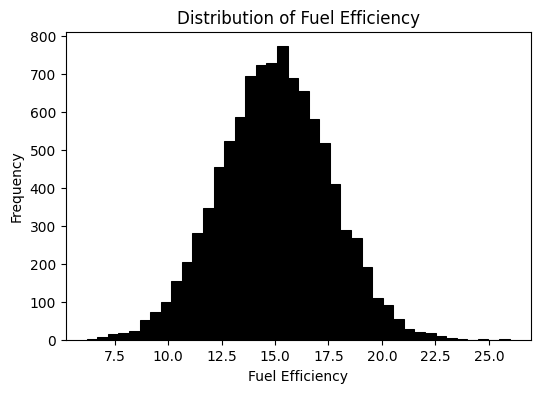

In [61]:
# EDA (Exploratory Data Analysis)
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency')
plt.title('Distribution of Fuel Efficiency')

plt.show()

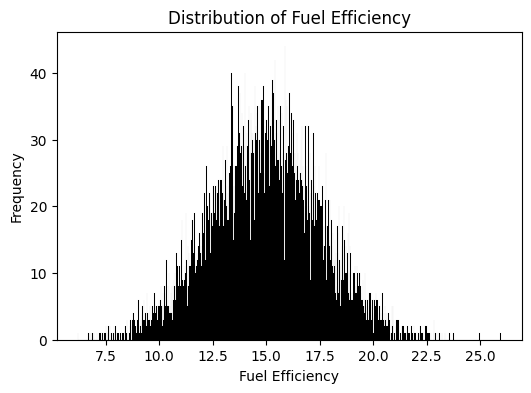

In [62]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=1000, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency')
plt.title('Distribution of Fuel Efficiency')

plt.show()

### Question 1
There's one column with missing values. What is it?

In [63]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [64]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [65]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

# df.loc (Label-based Indexing)
# df.iloc (Integer-location based Indexing)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [66]:
# y_train_orig = df_train.fuel_efficiency_mpg.values
# y_val_orig = df_val.fuel_efficiency_mpg.values
# y_test_orig = df_test.fuel_efficiency_mpg.values

# Use log + 1 normalization distribution
# y_train = np.log1p(df_train.msrp.values)
# y_val = np.log1p(df_val.msrp.values)
# y_test = np.log1p(df_test.msrp.values)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [67]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


def prepare_X(df, base, replace_null_value):
    df_num = df[base]
    df_num = df_num.fillna(replace_null_value)
    X = df_num.values
    return X


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [68]:
# Use mean to fill null values
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

horsepower_mean = df_train['horsepower'].mean()

X_train = prepare_X(df=df_train, base=base, replace_null_value=horsepower_mean)
w_0, w = train_linear_regression(X_train, y_train)

print('Bias for w0:', w_0)
print('Weight for w:', w)

X_val = prepare_X(df=df_val, base=base, replace_null_value=horsepower_mean)
y_pred = w_0 + X_val.dot(w)
rmse_val = rmse(y_val, y_pred)
print('RMSE result for dataset validation using mean fillna:', round(rmse_val,2))

Bias for w0: 28.925259951002698
Weight for w: [ 0.00012093  0.01030308 -0.00501009 -0.00023463]
RMSE result for dataset validation using mean fillna: 0.46


In [69]:
# Use 0 to fill null values
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

horsepower_mean = 0

X_train = prepare_X(df=df_train, base=base, replace_null_value=horsepower_mean)
w_0, w = train_linear_regression(X_train, y_train)

print('Bias for w0:', w_0)
print('Weight for w:', w)

X_val = prepare_X(df=df_val, base=base, replace_null_value=horsepower_mean)
y_pred = w_0 + X_val.dot(w)
rmse_val = rmse(y_val, y_pred)
print('RMSE result for dataset validation using 0 fillna:', round(rmse_val,2))

Bias for w0: 28.82736547365895
Weight for w: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992870e-04]
RMSE result for dataset validation using 0 fillna: 0.52


### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [70]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [71]:
X_train = prepare_X(df=df_train, base=base, replace_null_value=0)
X_val = prepare_X(df=df_val, base=base, replace_null_value=0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('Selected r %s:' %r, round(rmse(y_val, y_pred),2))

Selected r 0: 0.52
Selected r 0.01: 0.52
Selected r 0.1: 0.52
Selected r 1: 0.52
Selected r 5: 0.52
Selected r 10: 0.52
Selected r 100: 0.52


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [72]:
all_rmse_score = []
for seed_num in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed_num)
    
    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # df.loc (Label-based Indexing)
    # df.iloc (Integer-location based Indexing)
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    base = [
        'engine_displacement',
        'horsepower',
        'vehicle_weight',
        'model_year'
    ]
    X_train = prepare_X(df=df_train, base=base, replace_null_value=0)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df=df_val, base=base, replace_null_value=0)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    all_rmse_score.append(rmse_val)
    print(f'RMSE result for dataset validation using {seed_num} seed: {rmse_val}')

RMSE result for dataset validation using 0 seed: 2.654146919269655
RMSE result for dataset validation using 1 seed: 2.6512392443429635
RMSE result for dataset validation using 2 seed: 2.6527682175276466
RMSE result for dataset validation using 3 seed: 2.65311677101049
RMSE result for dataset validation using 4 seed: 2.652794188387153
RMSE result for dataset validation using 5 seed: 2.6527385831180568
RMSE result for dataset validation using 6 seed: 2.6510543015739456
RMSE result for dataset validation using 7 seed: 2.6510338638245785
RMSE result for dataset validation using 8 seed: 2.6512734261700253
RMSE result for dataset validation using 9 seed: 2.6519938622865014


In [73]:
# Note: Standard deviation shows how different the values are. 
# If it's low, then all values are approximately the same. 
# If it's high, the values are different. 
# If standard deviation of scores is low, then our model is stable.

std = round(np.std(all_rmse_score), 3)
print(f'Std result for RMSE on all seeds: {std}')

Std result for RMSE on all seeds: 0.001


### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [74]:
np.random.seed(9)
    
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

# df.loc (Label-based Indexing)
# df.iloc (Integer-location based Indexing)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train_all = pd.concat([df_train, df_val])
y_train_all = df_train_all.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train_all['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [75]:
X_train_all = prepare_X(df=df_train_all, base=base, replace_null_value=0)
X_test = prepare_X(df=df_test, base=base, replace_null_value=0)

w_0, w = train_linear_regression_reg(X_train_all, y_train_all, r=0.001)
y_pred = w_0 + X_test.dot(w)
print(f'RMSE for selected r 0.001: {rmse(y_val, y_pred)}')

RMSE for selected r 0.001: 3.6444256031157183
